<a href="https://colab.research.google.com/github/sokhunter/face_mask_detection_app/blob/YOLO-test/Data_Augmentation_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation del Dataset 
hecho por: Renzo Damián
Dataset utilizado: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

## Instalamos Dependencias

In [ ]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline
from google.colab.patches import cv2_imshow

## Montamos el Google drive y creamos los directorios


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [ ]:
%mkdir augmented_data
%cd augmented_data

mkdir: cannot create directory ‘augmented_data’: File exists
/content/drive/MyDrive/YOLO/augmented_data


In [ ]:
%mkdir output

In [ ]:
%cp -r /content/drive/MyDrive/YOLO/darknet_train_data /content/drive/MyDrive/YOLO/augmented_data

## Creamos la herramientas que nos permitiran leear los archivos y escribir los nombres
- Leer lineas a coordenadas
- Obtener el nombre del archivo
- Escribir nuevas coordenadas a txt

In [ ]:
import os
import cv2
import numpy as np
import random

def file_lines_to_list(path):
    '''
    ### Convert Lines in TXT File to List ###
    path: path to file
    '''
    with open(path) as f:
        content = f.readlines()
    content = [(x.strip()).split() for x in content]
    return content

def get_file_name(path):
    '''
    ### Get Filename of Filepath ###
    path: path to file
    '''
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname

def write_anno_to_txt(boxes, filepath):
    '''
    ### Write Annotation to TXT File ###
    boxes: format [[obj x1 y1 x2 y2],...]
    filepath: path/to/file.txt
    '''
    txt_file = open(filepath, "w")
    for box in boxes:
        print(box[0], (box[1]), (box[2]), (box[3]), (box[4]), file=txt_file)
    txt_file.close()

In [ ]:
img_name = "maksssksksss0"
dir_path = f"output"
gt_boxes = file_lines_to_list("../darknet_train_data/maksssksksss0.txt")
image = cv2.imread("../darknet_train_data/maksssksksss0.png")

In [ ]:
def cutout(img, gt_boxes, amount=0.5):
    '''
    ### Cutout ###
    img: image
    gt_boxes: format [[obj x1 y1 x2 y2],...]
    amount: num of masks / num of objects 
    '''
    height, width = int(img.shape[0]), int(img.shape[1])
    out = img.copy()
    ran_select = random.sample(gt_boxes, round(amount*len(gt_boxes)))
    for box in ran_select:
        a = float(box[1])*width
        b = float(box[2])*height
        c = float(box[3])*width
        d = float(box[4])*height
        x1 = int(a - c/2)
        y1 = int(b - d/2)
        x2 = int(a + c/2)
        y2 = int(b + c/2)
        mask_w = int((x2 - x1)*0.5)
        mask_h = int((y2 - y1)*0.5)
        mask_x1 = random.randint(x1, x2 - mask_w)
        mask_y1 = random.randint(y1, y2 - mask_h)
        mask_x2 = mask_x1 + mask_w
        mask_y2 = mask_y1 + mask_h
        cv2.rectangle(out, (mask_x1, mask_y1), (mask_x2, mask_y2), (0, 0, 0), thickness=-1)
    return out

In [ ]:
cut_img = cutout(image, gt_boxes, amount=0.5)
cv2.imwrite(f"{img_name}_cutout.png", cut_img)

True

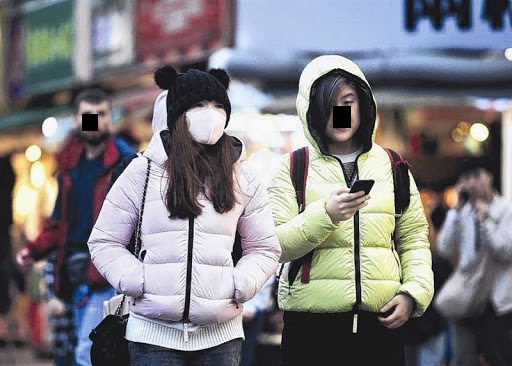

In [ ]:
image = cv2.imread(f"{img_name}_cutout.png")
cv2_imshow(image)

In [ ]:
def colorjitter(img, cj_type="b"):
    '''
    ### Different Color Jitter ###
    img: image
    cj_type: {b: brightness, s: saturation, c: constast}
    '''
    if cj_type == "b":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return img

In [ ]:
b_img = colorjitter(image, cj_type="b")
s_img = colorjitter(image, cj_type="s")
c_img = colorjitter(image, cj_type="c")
cv2.imwrite(f"{dir_path}/{img_name}_brightness.png", b_img)
cv2.imwrite(f"{dir_path}/{img_name}_saturation.png", s_img)
cv2.imwrite(f"{dir_path}/{img_name}_contrast.png", c_img)

True

In [ ]:
def noisy(img, noise_type="gauss"):
    '''
    ### Adding Noise ###
    img: image
    cj_type: {gauss: gaussian, sp: salt & pepper}
    '''
    if noise_type == "gauss":
        image=img.copy() 
        mean=0
        st=0.7
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        return image
    
    elif noise_type == "sp":
        image=img.copy() 
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        return image

In [ ]:
gaussn_img = noisy(image, noise_type="gauss")
sp_img = noisy(image, noise_type="sp")
cv2.imwrite(f"{dir_path}/{img_name}_gaussnoise.png", gaussn_img)
cv2.imwrite(f"{dir_path}/{img_name}_spnoise.png", sp_img)


True

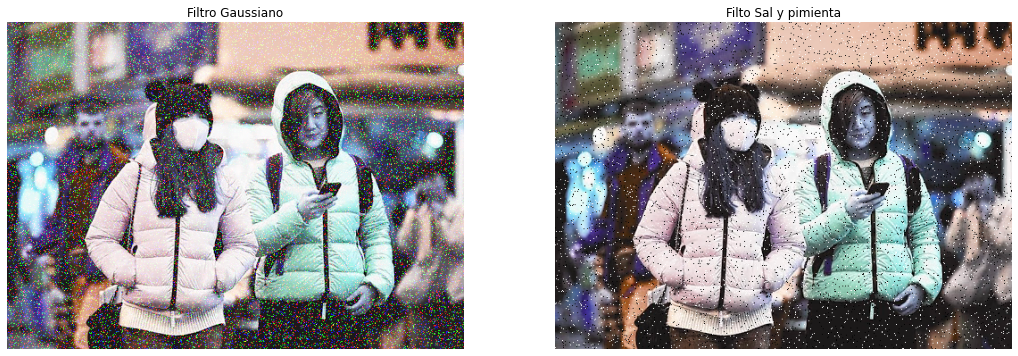

In [ ]:
w = 20
h = 20
imgs = [gaussn_img,sp_img]
titles = ["Filtro Gaussiano","Filto Sal y pimienta"]

fig = plt.figure(figsize=(18, 18))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(titles[i-1])
    plt.axis('off')
    plt.imshow(imgs[i-1])
plt.show()

In [ ]:
def filters(img, f_type = "blur"):
    '''
    ### Filtering ###
    img: image
    f_type: {blur: blur, gaussian: gaussian, median: median}
    '''
    if f_type == "blur":
        image=img.copy()
        fsize = 9
        return cv2.blur(image,(fsize,fsize))
    
    elif f_type == "gaussian":
        image=img.copy()
        fsize = 9
        return cv2.GaussianBlur(image, (fsize, fsize), 0)
    
    elif f_type == "median":
        image=img.copy()
        fsize = 9
        return cv2.medianBlur(image, fsize)

In [ ]:
blur_img = filters(image, f_type = "blur")
gaussf_img = filters(image, f_type = "gaussian")
median_img = filters(image, f_type = "median")
cv2.imwrite(f"{dir_path}/{img_name}_blur.png", blur_img)
cv2.imwrite(f"{dir_path}/{img_name}_gaussblur.png", gaussf_img)
cv2.imwrite(f"{dir_path}/{img_name}_median.png", median_img)

True

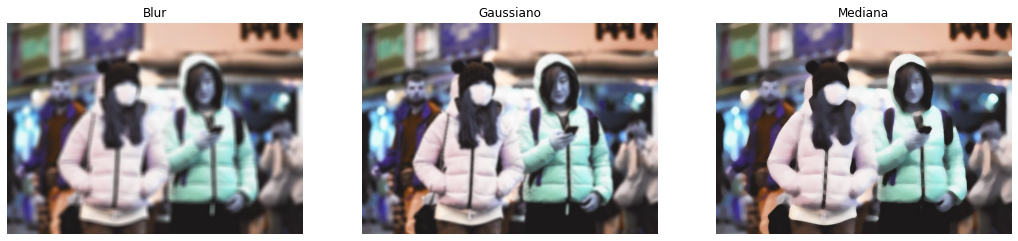

In [ ]:
w = 20
h = 20
imgs = [blur_img,gaussf_img,median_img]
titles = ["Blur","Gaussiano","Mediana"]
fig = plt.figure(figsize=(18, 18))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(titles[i-1])
    plt.axis('off')
    plt.imshow(imgs[i-1])
plt.show()

## Aplicar para todas la imágenes

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse

dir_path = f"output"
path = "./darknet_train_data"
for annotation in os.listdir(path):
    if annotation.endswith('.png'):
        img_name = annotation[:-4]
        print(img_name)
        gt_boxes = file_lines_to_list(f"../darknet_train_data/{img_name}.txt")
        image = cv2.imread(f"../darknet_train_data/{img_name}.png")
        ## Crear Cutouts
        cut_img = cutout(image, gt_boxes, amount=0.5)
        cv2.imwrite(f"{dir_path}/{img_name}_cutout.png", cut_img)
        filepath = f"{dir_path}/{img_name}_cutout.txt"
        write_anno_to_txt(gt_boxes, filepath)
        ## Crear distorsion del color
        b_img = colorjitter(image, cj_type="b")
        s_img = colorjitter(image, cj_type="s")
        c_img = colorjitter(image, cj_type="c")
        cv2.imwrite(f"{dir_path}/{img_name}_brightness.png", b_img)
        filepath = f"{dir_path}/{img_name}_brightness.txt"
        write_anno_to_txt(gt_boxes, filepath)
        cv2.imwrite(f"{dir_path}/{img_name}_saturation.png", s_img)
        filepath = f"{dir_path}/{img_name}_saturation.txt"
        write_anno_to_txt(gt_boxes, filepath)
        cv2.imwrite(f"{dir_path}/{img_name}_contrast.png", c_img)
        filepath = f"{dir_path}/{img_name}_contrast.txt"
        write_anno_to_txt(gt_boxes, filepath)
        ## Crear filtros de ruido
        gaussn_img = noisy(image, noise_type="gauss")
        sp_img = noisy(image, noise_type="sp")
        cv2.imwrite(f"{dir_path}/{img_name}_gaussnoise.png", gaussn_img)
        filepath = f"{dir_path}/{img_name}_gaussnoise.txt"
        write_anno_to_txt(gt_boxes, filepath)
        cv2.imwrite(f"{dir_path}/{img_name}_spnoise.png", sp_img)
        filepath = f"{dir_path}/{img_name}_spnoise.txt"
        write_anno_to_txt(gt_boxes, filepath)
        ## Crear con filtros de difuminado
        blur_img = filters(image, f_type = "blur")
        gaussf_img = filters(image, f_type = "gaussian")
        median_img = filters(image, f_type = "median")
        cv2.imwrite(f"{dir_path}/{img_name}_blur.png", blur_img)
        filepath = f"{dir_path}/{img_name}_blur.txt"
        write_anno_to_txt(gt_boxes, filepath)
        cv2.imwrite(f"{dir_path}/{img_name}_gaussblur.png", gaussf_img)
        filepath = f"{dir_path}/{img_name}_gaussblur.txt"
        write_anno_to_txt(gt_boxes, filepath)
        cv2.imwrite(f"{dir_path}/{img_name}_median.png", median_img)
        filepath = f"{dir_path}/{img_name}_median.txt"
        write_anno_to_txt(gt_boxes, filepath)

maksssksksss83
maksssksksss839
maksssksksss840
maksssksksss841
maksssksksss842
maksssksksss843
maksssksksss845
maksssksksss844
maksssksksss846
maksssksksss848
maksssksksss84
maksssksksss850
maksssksksss851
maksssksksss852
maksssksksss85
maksssksksss88
maksssksksss86
maksssksksss87
maksssksksss89
maksssksksss8
maksssksksss90
maksssksksss91
maksssksksss92
maksssksksss93
maksssksksss94
maksssksksss95
maksssksksss97
maksssksksss96
maksssksksss98
maksssksksss99
maksssksksss9
maksssksksss104
maksssksksss108
maksssksksss117
maksssksksss122
maksssksksss136
maksssksksss125
maksssksksss138
maksssksksss139
maksssksksss145
maksssksksss164
maksssksksss166
maksssksksss16
maksssksksss180
maksssksksss190
maksssksksss192
maksssksksss193
maksssksksss213
maksssksksss216
maksssksksss227
maksssksksss229
maksssksksss239
maksssksksss242
maksssksksss256
maksssksksss262
maksssksksss264
maksssksksss270
maksssksksss271
maksssksksss276
maksssksksss297
maksssksksss308
maksssksksss30
maksssksksss315
maksssksksss319